# UNSUPERVISED CLUSTERING

# 1. K-Means using Barnett Shale Core Data.


K-Means is one of the most commonly used unsupervised clustering algorithms. It is simple to use and intuitive. 

Remember, we are not biased in any way. We are using our input data to detect any structure or patterns. Hence the name 'Unsupervised' learning. A cluster is a collection of points that:
* Are similar to data within a cluster
* Are dissimilar to data within other clusters

# 1.1 The K-means algorithm

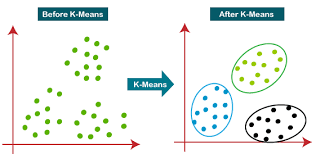


### Partitioning Algorithms
* Determines all clusters at once
* Typically uses either similarity or dissimilarity measures



## 1.2 Measures of Similarity

Typical measure of similarity is distance. In 2-D and 3-D, all of you should be familiar with distances. The extension to multiple dimensions is similar. 

We typically use 3 kinds of distance measures:
* Euclidean distance
* Manhattan distance or block distance
* Mahalanobis distance (weights the distance by the inverse of the standard deviation)

But there are other distance measures as well: Minkowski distance and Hamming distance come to mind. For really high dimensions (50+), use the Manhattan distance. Without going in to the proof, it is considered to be a better metric of dissimilarity/similarity in high dimensions.



### Euclidean Distance

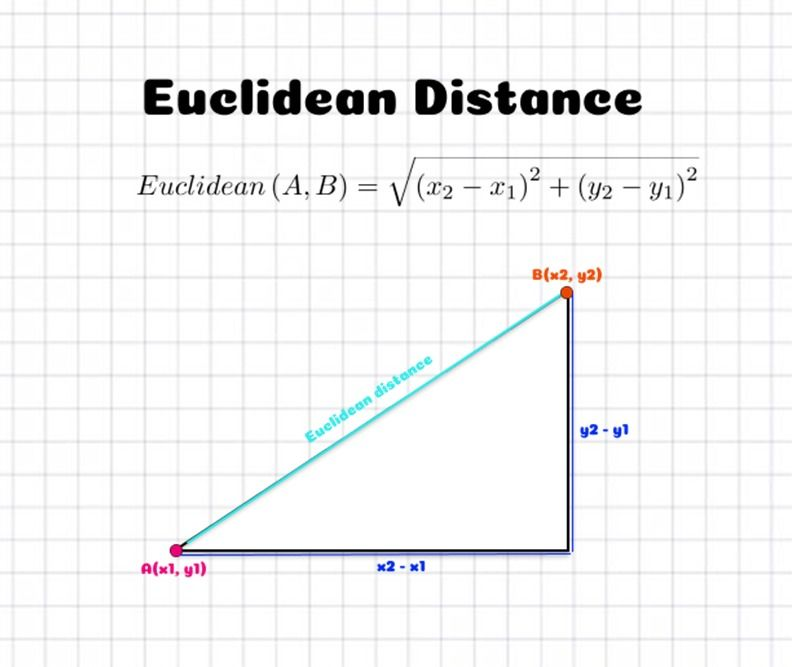

### Manhattan Distance

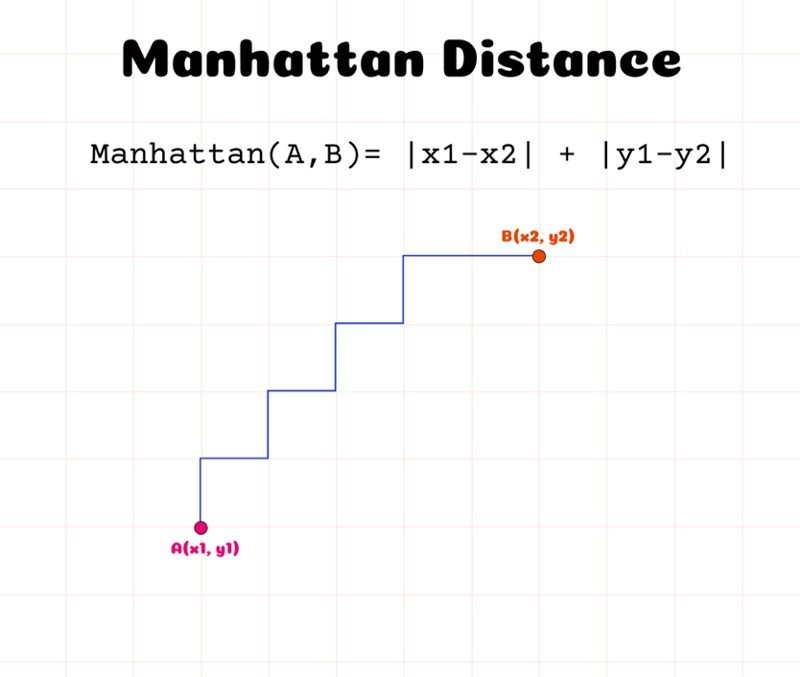

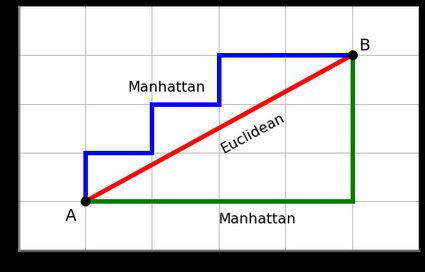

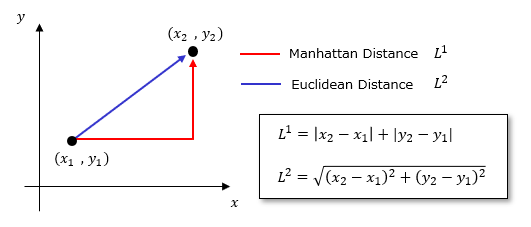

## 1.3 K-Means in Action

Remember that this is unsupervised clustering. You do not know where the clusters are located, how many clusters are there and the characteristics of the clusters. 

* Define the number of clusters, say 2 or 3. You still dont know what is optimal.
* The algorthm randomly selects 2 centroids corresponding to the 2 clusters. Of course, in all cases, these chosen centroids are wrong.
* Compute the distance of each data point to each centroid and assign accordingly
* Once all points have been assigned, recompute the centroids.
* Go back to Step 3 and repeat till convergence.

## 1.4 Using K-Means in Python

Note that I have to import the module scikit.learn which is probably the go to module for most machine learning algorithms.


I have borrowed some examples from this excellent book: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ by Aurelien Geron. A github page that accompanies this book is https://github.com/ageron/handson-ml2.

### Toy Example
We will create a **toy dataset** with 2 variables or **features**, $X_1$ and $X_2$ and 3 clusters.

I will specify the cluster standard deviation using a numpy array, blob_std. The command **random_state = 0** is specified so that every time you run the code, you get the same result. You can see what happens if you remove that option. Each time, you will get a new set of clusters. 

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import sklearn

The sklearn command **make_blobs** can create some very nice synthetic datasets for playing with various algorithms. 

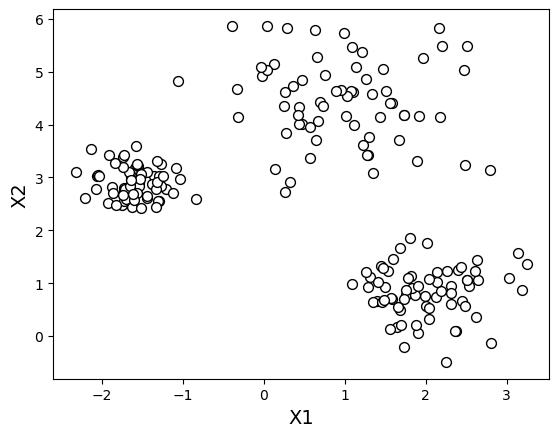

In [2]:
from sklearn.datasets import make_blobs


# Create dataset
blob_std = np.array([0.8, 0.5, 0.3])

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=blob_std, shuffle=True, random_state=0)

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)
plt.show()

**Color** the points depending on the cluster they belong to. 

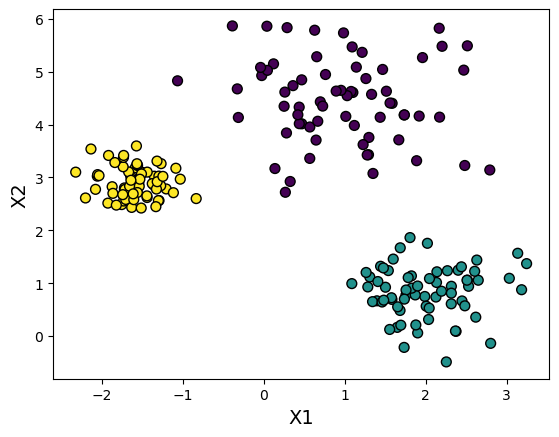

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='black', s=50)
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)
plt.show()

In the plot above, you can see that you have 3 clusters. This is because you created 3 clusters. Now our job is to use the inputs $X_1$ and $X_2$ belonging to each of the points and see if we can identify clusters. Remember the definition of a cluster:
1. Group of points that are similar (**minimum variability within a cluster**)
2. Points belonging to one cluster are dissimilar to points belonging to another cluster (**inter-cluster distance should be maximum**)


In [4]:
from sklearn.cluster import KMeans

When you use any algorithm in **Scikit Learn or Sklearn** for short, you will have several options. The best way to figure out each option is to look it up. The sklearn manual is actually pretty good. 

In the statement below, I am creating a **model called kmeans_core** which uses the **sklearn KMeans algorithm** with the option of 3 clusters. I am assuming there are 3 clusters. 

Also in **sklearn** you will typically do a model.fit_predict (data) where:
1. model is the variable you chose to use to signify a specific ML algorithm
2. data is a numpy array or pandas dataframe or some other object depending on what sklearn needs for the specific model
3. **fit_predict** will **fit** the data to the model. In this case, it will fit 3 clusters to the core data. It also **predicts**, which means that it will give you the label associated with each data point.In this case, we are storing the labels in a Numpy array called y_pred.

In [5]:
kmeans_core = KMeans(n_clusters=3, random_state = 42)

y_pred = kmeans_core.fit_predict(X) # Determine clusters in dataset X. Store results in y_pred

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


You can print the lables although this pretty meaningless at this point. 

In [6]:
print(y_pred)

[0 2 2 0 2 0 1 1 2 0 2 0 2 2 2 0 1 1 2 0 0 1 2 2 0 2 1 0 0 0 2 2 0 2 1 1 2
 1 1 0 1 0 0 0 2 2 2 0 2 2 2 1 0 0 0 0 1 1 2 2 0 0 2 1 1 0 1 1 0 1 1 2 2 0
 2 0 1 1 1 0 0 2 2 1 1 2 2 0 2 1 0 0 1 2 1 2 2 0 0 1 1 2 0 2 0 2 1 2 0 1 2
 0 1 0 2 2 2 1 0 0 1 1 0 2 1 2 0 1 0 2 0 1 1 1 2 1 1 2 1 0 0 0 2 1 1 2 0 0
 1 2 1 0 0 0 2 1 1 1 2 2 0 0 0 0 2 2 1 0 1 1 0 1 2 1 0 0 2 0 2 1 2 0 1 1 1
 2 0 1 2 2 0 0 1 1 1 1 0 1 2 1]


More importantly, you can plot the data, colored by the predicted labels.

Text(0, 0.5, 'X2')

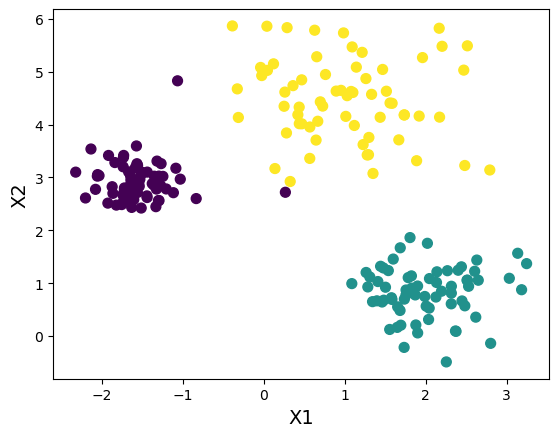

In [8]:
plt.scatter(X[:, 0], X[:, 1], c = y_pred, s = 50) # Plot X, color the points by cluster number
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)

You can obtain the individual **cluster means** or alternatively plot them. This is why we do **fit_predict**. 

In [11]:
kmeans_core.cluster_centers_

array([[-1.55145616,  2.93136145],
       [ 2.00955762,  0.8313862 ],
       [ 1.00124241,  4.47324221]])

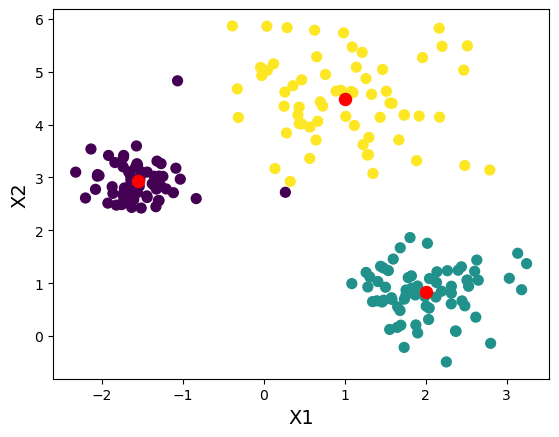

In [12]:
plt.scatter(X[:, 0], X[:, 1], c = y_pred, s = 50) # Plot X, color the points by cluster number
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)
plt.scatter(kmeans_core.cluster_centers_[:,0],kmeans_core.cluster_centers_[:,1], s = 75, c='r', marker = 'o')

## Watching K-Means in Action Step-by-Step

So far, I used the default options to run KMeans. And it does a pretty good job. But if you want to see the random assignment of cluster centers over 3 iterations, follow along. I am creating 3 models:
1. Iter1 allows only one iteration
2. Iter2 allows a max of 2 iterations
3. Iter3 allows a max of 3 iterations.

This is really all there is to K-means. But let's take a closer look at what happens at each iteration. I will define 3 different models, Kmeans_iter1, kmeans_iter2 and kmeans_iter3 to show how the centroids are moving with 1, 2 and 3 iterations. 

In [13]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1) # Maximum interation is 1
kmeans_iter2 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1) # Maximum iterations is 2
kmeans_iter3 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1) # Maximum iterations is 3

kmeans_iter1.fit_predict(X)
kmeans_iter2.fit_predict(X)
kmeans_iter3.fit_predict(X)

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklear

array([0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1,
       0, 2])

Let's plot the data and the cluster centers as we move from iteration to iteration.

In [14]:
kmeans_iter1.cluster_centers_

array([[-0.30389671,  3.6849122 ],
       [ 1.99594415,  0.9985487 ],
       [ 2.07195272,  0.06522474]])

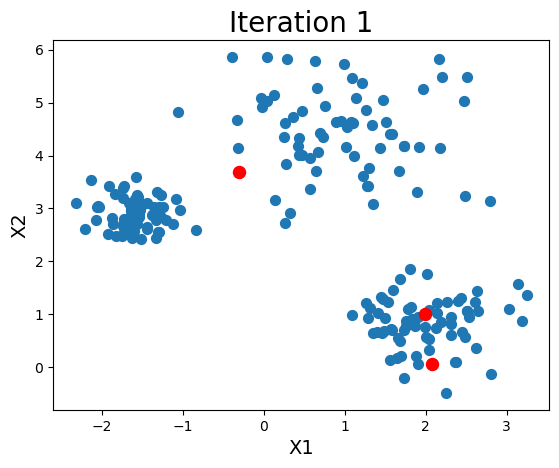

In [16]:
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.scatter(kmeans_iter1.cluster_centers_[:,0],kmeans_iter1.cluster_centers_[:,1], s = 75, c='r', marker = 'o')
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title ("Iteration 1", fontsize=20)
plt.show()

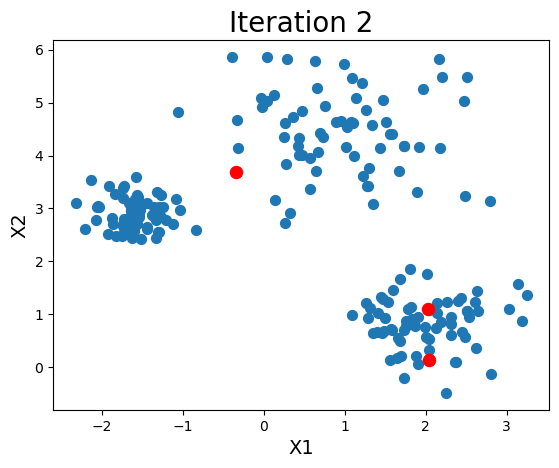

In [17]:
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.scatter(kmeans_iter2.cluster_centers_[:,0],kmeans_iter2.cluster_centers_[:,1], s = 75, c='r', marker = 'o')
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title ("Iteration 2", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Iteration 3')

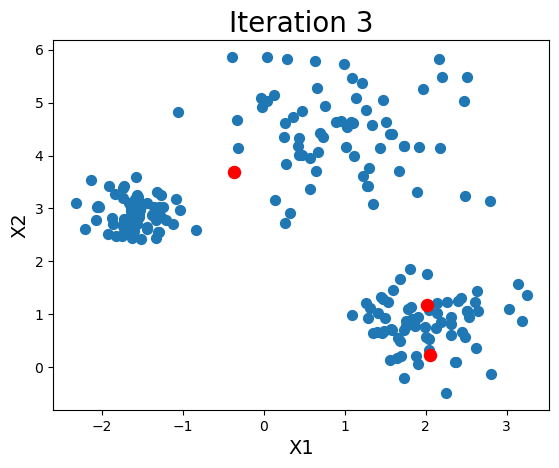

In [18]:
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.scatter(kmeans_iter3.cluster_centers_[:,0],kmeans_iter3.cluster_centers_[:,1], s = 75, c='r', marker = 'o')
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title ("Iteration 3", fontsize=20)

You hopefully get the idea of how K-means works and allows the centroid to move from iteration to iteration. 

## Erroneous Convergence
Becuase we start with a random assignment of cluster centers, it is posible that the algorithm converges to the wrong solution. The example below illustrates that. 

Let us create a new dataset.

Text(0, 0.5, 'X2')

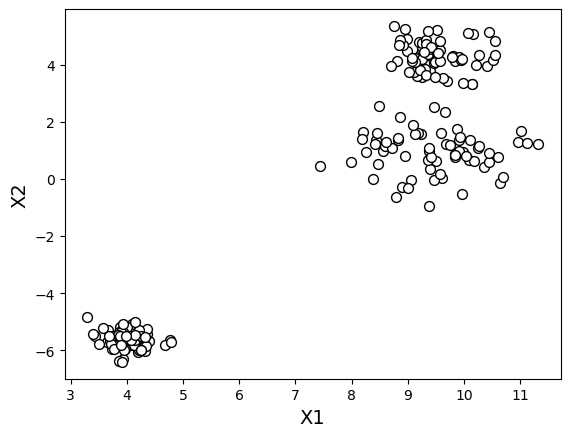

In [15]:
from sklearn.datasets import make_blobs


# create dataset
blob_std = np.array([0.8, 0.5, 0.3])
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=blob_std, shuffle=True, random_state=4)

# plot
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)

In [16]:
kmeans_init1 = KMeans(n_clusters=3, init="random", n_init=1, algorithm="full", random_state=33)
kmeans_init1.fit(X)

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=3, n_init=1, random_state=33)

Text(0.5, 1.0, 'K Means Erroneous Convergence')

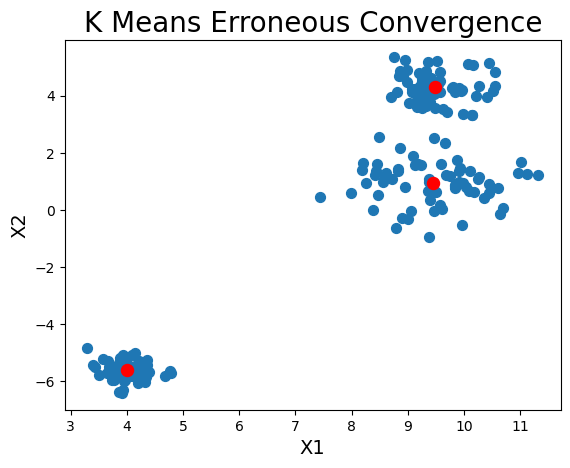

In [17]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.scatter(kmeans_init1.cluster_centers_[:,0],kmeans_init1.cluster_centers_[:,1], s = 75, c='r', marker = 'o')
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title ("K Means Erroneous Convergence", fontsize=20)

## Overcoming erroneous convergence
K-Means can converge to the wrong solution if you do not allow multiple possibilities for initialization. Notice that in the code above, I have specified **n_init =1** which means that I am allowing KMeans to only start with just **one set of initial cluster centers**. By pure chance, they were the wrong choice. 

We can overcome this, by allowing KMeans to:
1. Start with one set of cluster centers, converge to a solution
2. Re-start with another set of cluster centers, converge to another (maybe) solution
3. Re-start again with another set of cluster centers, converge to another (maybe) solution
4. ...
.
.
.
10. Re-start again with another set of cluster centers, converge to another (maybe) solution

**Chose the best solution of these 10 randomly initialized KMeans solutions**. 

In [18]:
kmeans_rnd_10_inits = KMeans(n_clusters=3, init="random", n_init=10, algorithm="full", random_state=33)
kmeans_rnd_10_inits.fit(X)

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=3, n_init=10,
       random_state=33)

Text(0.5, 1.0, 'K Means Correct Convergence')

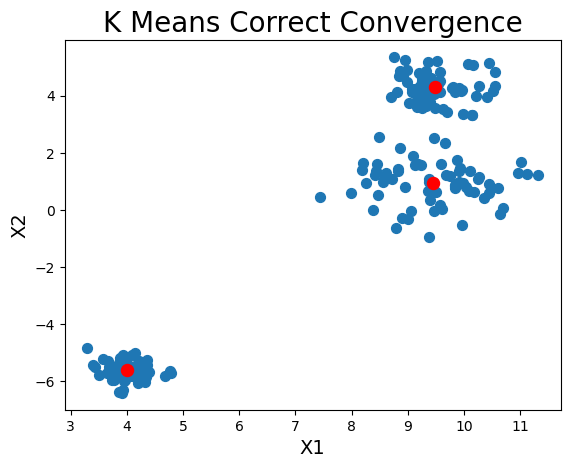

In [19]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.scatter(kmeans_rnd_10_inits.cluster_centers_[:,0],kmeans_rnd_10_inits.cluster_centers_[:,1], s = 75, c='r', marker = 'o')
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title ("K Means Correct Convergence", fontsize=20)

## Definition of Optimal Clustering

We use a quantity called **SSW (sum-of-squares-within)** or what sklearn calls as **Inertia**. It is like the variance except for the N-1 term in the denominator. Look at the picture below: Which of the clustering schemes has the lowest **variability within a cluster**. 

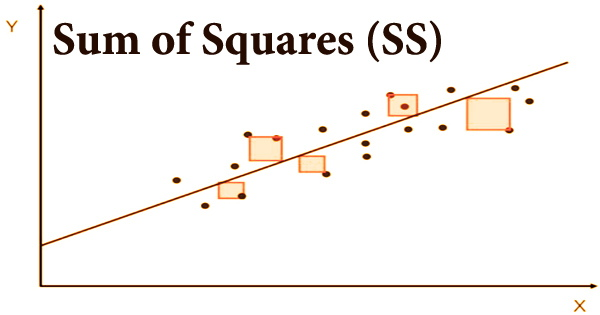

The wrong clustering on the left has one big cluster (lots of variability within the cluster), while the one on the right has a more balanced variability across all 3 clusters. Sometimes it is also called sum-of-squared errors (SSE)

If you have $K$ clusters and $N_j$ points in the j'th cluster, then, the SSW is given by:

<font size="15">$$ {SSW} = \sum \limits _{j=1} ^{K} \sum \limits _{i=1} ^{N_j} (X_{ij} - \hat {X_{j}})2 $$</font>

# 1.5 Application of K-Means to Core Data
Let's put it all together. 

Notice that because **K-means uses a distance measure, you need to scale your input variables**. I am using something called a MinMaxScaler which scales all variables between 0 and 1. There are other choices as well and we have discussed those.

### Read core data from the file in to a pandas dataframe

In [21]:
data = pd.read_csv('CleanedUpCoreData.csv')

data.head()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
0,6432.5,6.67,4.15,38.6,0.0
1,6434.5,6.07,4.25,48.6,6.2
2,6436.5,4.91,3.40,41.0,2.5
3,6438.5,6.00,0.39,4.6,66.4
4,6440.6,5.63,3.90,37.0,0.6


In [22]:
# Dropping the depth column
df = data.drop(columns='Depth')

df.head()

,CorrectedPorosity,TOC,Quartz,Calcite
0,6.67,4.15,38.6,0.0
1,6.07,4.25,48.6,6.2
2,4.91,3.40,41.0,2.5
3,6.00,0.39,4.6,66.4
4,5.63,3.90,37.0,0.6


In [23]:
# renaming the porosity column
df.rename(columns={'CorrectedPorosity': 'Porosity'}, inplace=True)

In [24]:
df.head()

,Porosity,TOC,Quartz,Calcite
0,6.67,4.15,38.6,0.0
1,6.07,4.25,48.6,6.2
2,4.91,3.40,41.0,2.5
3,6.00,0.39,4.6,66.4
4,5.63,3.90,37.0,0.6


### Matrix Scatterplot

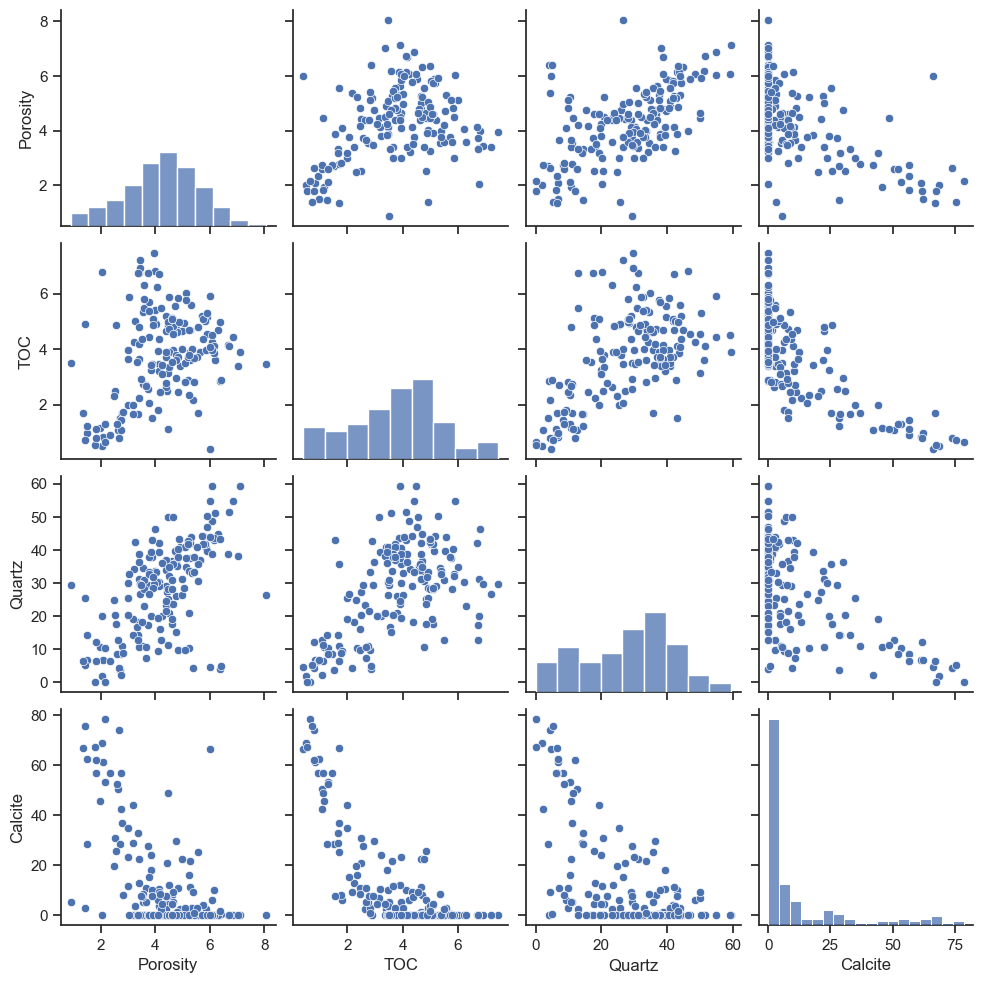

In [25]:
sns.set(style = 'ticks') # Set the background 
sns.pairplot(df) # Create a matrix scatterplot

### Boxplots

<Axes: ylabel='Porosity'>

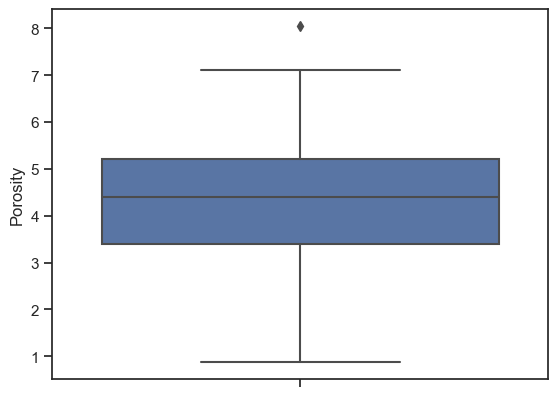

In [25]:
sns.boxplot(y = df['Porosity'])

<Axes: ylabel='TOC'>

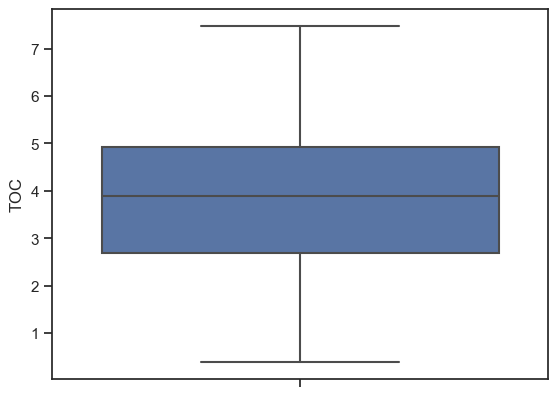

In [26]:
sns.boxplot(y = df['TOC'])

<Axes: ylabel='Calcite'>

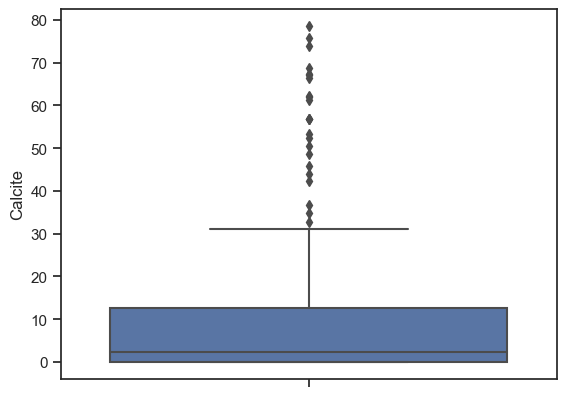

In [27]:
sns.boxplot(y = df['Calcite'])

### K-Means with Scaling

One additional comment: Below you will notice that I am using **init = "Kmeans++"** instead of **init = "random"**. Note that the K-means++ option is a default option.

You can try to grasp the math below, but the essence of it is that the initial choice of centroids or means is made by maximizing the distance between them. This avoids the problem of a random choice where you may inadvertently place two/three or more centroids close to one another. 

1. Take one centroid $c_1$, chosen at random from the dataset.
2. Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
3. Repeat the previous step until all $k$ centroids have been chosen.
4. The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

#### Scale Variables

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

data_scaled = scaler.fit_transform(data)

#### Run KMeans on Scaled Variables

In [27]:
Core_kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 11)
cluster_labels = Core_kmeans.fit_predict(data_scaled)

print(Core_kmeans.labels_)
print(Core_kmeans.cluster_centers_)

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[0.28314086 0.61106601 0.49706334 0.59482889 0.06999354]
 [0.23727181 0.23007387 0.11539466 0.15425864 0.6653944 ]
 [0.74046781 0.43342695 0.59195858 0.47396338 0.04247272]]


In [29]:
print(cluster_labels)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


#### Plot Results

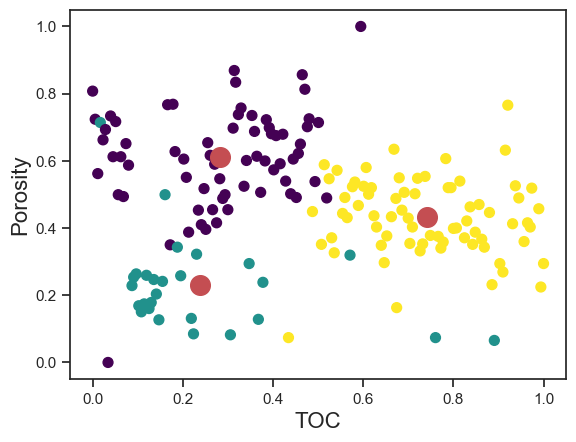

In [30]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.xlabel('TOC', fontsize = 16)
plt.ylabel('Porosity',fontsize = 16)
plt.scatter(Core_kmeans.cluster_centers_[:, 0], Core_kmeans.cluster_centers_[:, 1], c='r', s=200);

#### Add the KMeans labels to the Pandas Dataframe and plot all data colored by cluster label

In [33]:
df['Facies'] = Core_kmeans.labels_
df.head()

,Porosity,TOC,Quartz,Calcite,Facies
0,6.67,4.15,38.6,0.0,0
1,6.07,4.25,48.6,6.2,0
2,4.91,3.40,41.0,2.5,0
3,6.00,0.39,4.6,66.4,1
4,5.63,3.90,37.0,0.6,0


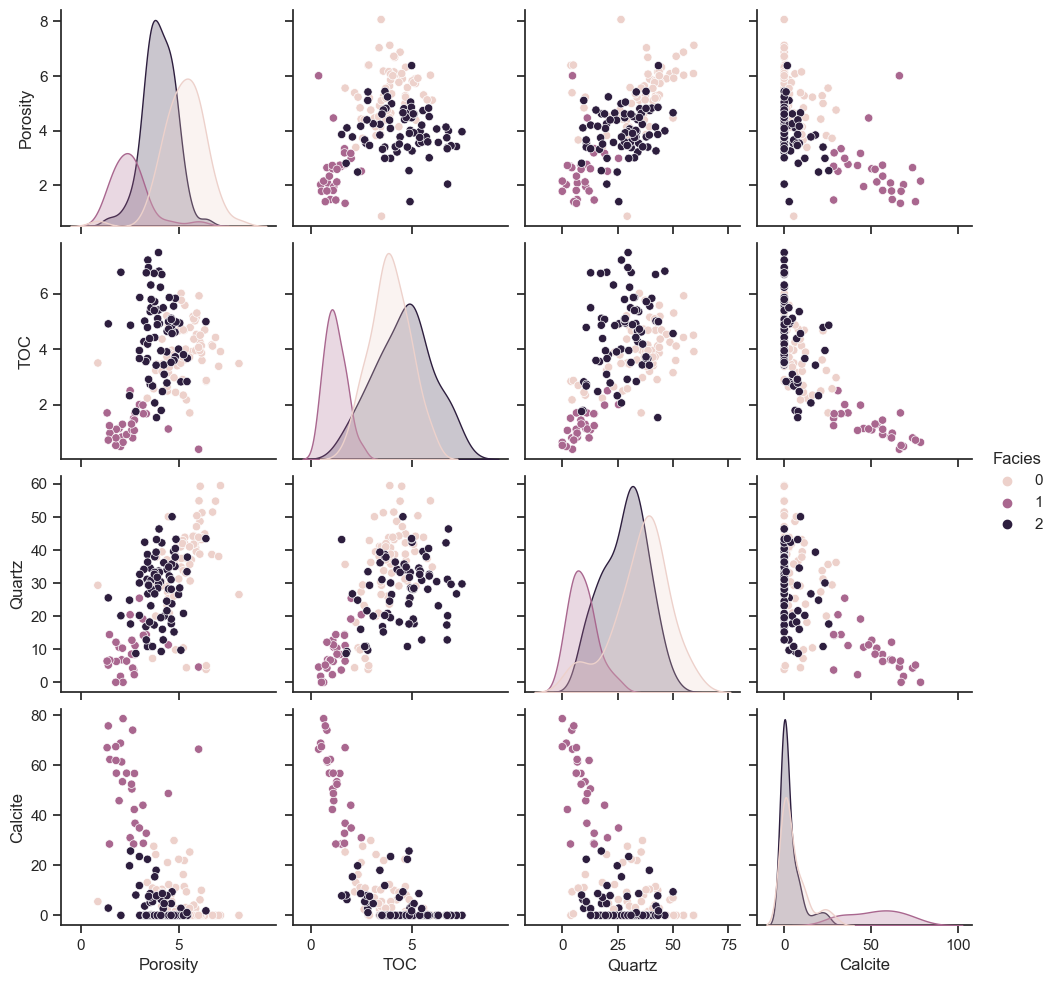

In [32]:
sns.set(style = 'ticks') # Set the background to ticks

sns.pairplot(df, vars=['Porosity','TOC','Quartz','Calcite'], hue = 'Facies') # Create a matrix scatterplot

## Determining Optimal Clusters
Above I chose the number of clusters as 3. How do I know it is optimal. Why not 7? Or 6?
Well, we can choose a metric called Sum-of-Squares-Within (SSW) a cluster and Sum-of-Squares-Between (SSB) clusters to do this. 


**Sum of Squares Between (SSB)** 

This represents the squared distance between the individual cluster centers and the overall data center (mean). Larger values indicate good separation between clusters. Small values indicate that clusters might be close by.

**Sum of Squares Within (SSW)**

Within group sum of squares (SSW) is the sum of squared distances between centroid of each cluster and the points in that cluster. The average distance from observations to the cluster centroid is a measure of the variability of the observations within each cluster. In general, a cluster that has a smaller average distance is more compact than a cluster that has a larger average distance. Clusters that have higher values exhibit greater variability of the observations within the cluster

You would like as high of an SSB as possible and as small an SSW.


### Workflow for Optimal Cluster Numbers
Here I am actually telling the code to create 3 different groupings - once with 2 clusters, once with 3 and once with 4, 5 and 6. Just so that I get an idea if things are looking good as I increase or decrease the pre-specified number of clusters. 

So which one is the best? Obviously you would have to try with multiple other grouping schemes, 1 cluster, 2, 3, 4, 5, 5, 6, 7 and so on maybe up until 10. Draw the elbow plot with SSW and SSB and find the optimal number. 
Unfortunately for us, Python does not output the SSB - it only outputs the SSW and it is also strangely called inertia!


I have output the SSW values for different clustering arrangements. Chose an optimal number of clusters by plotting an elbow plot.

Notice that I am using kmeans within a loop. You could have done kmeans individually 10 times with different cluster numbers and manually collected the SSW - which is tedious. The 2 lines below do exactly what we wanted to do more elegantly.

In [34]:
SSW = np.zeros(10) # Initialize the list SSW to be empty

for k in range(1,10):
    
    kmeans_for_Core = KMeans(n_clusters = k, random_state=42).fit(data_scaled) # All the other K-Means options are defaulted
    
    SSW[k] = kmeans_for_Core.inertia_ # Compute the sum of squares within


print('The SSW values are', SSW[1:10])

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

The SSW values are [47.62327374 27.62940266 18.80112764 15.62244647 12.94486388 11.89198032
 11.01328829  9.93949243  9.20229229]


What is your choice of optimal number of clusters?

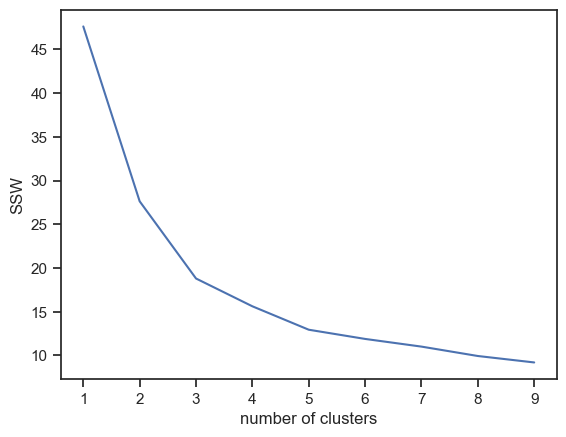

In [35]:
clusters = range(1, 10)
plt.ylabel('SSW')
plt.xlabel('number of clusters')
plt.plot(clusters, SSW[1:10])

## It is always useful to vizualize the entire dataset color coded by class label.
In this example, the data are color coded by facies type. 

For the optimal number of clusters, we will also plot the boxplots of the properties by facies type. 

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
y_kmeans = kmeans.fit_predict(data_scaled)

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Note that I have to append the labels variable kmeans.labels_ to the previous dataframe, df. 

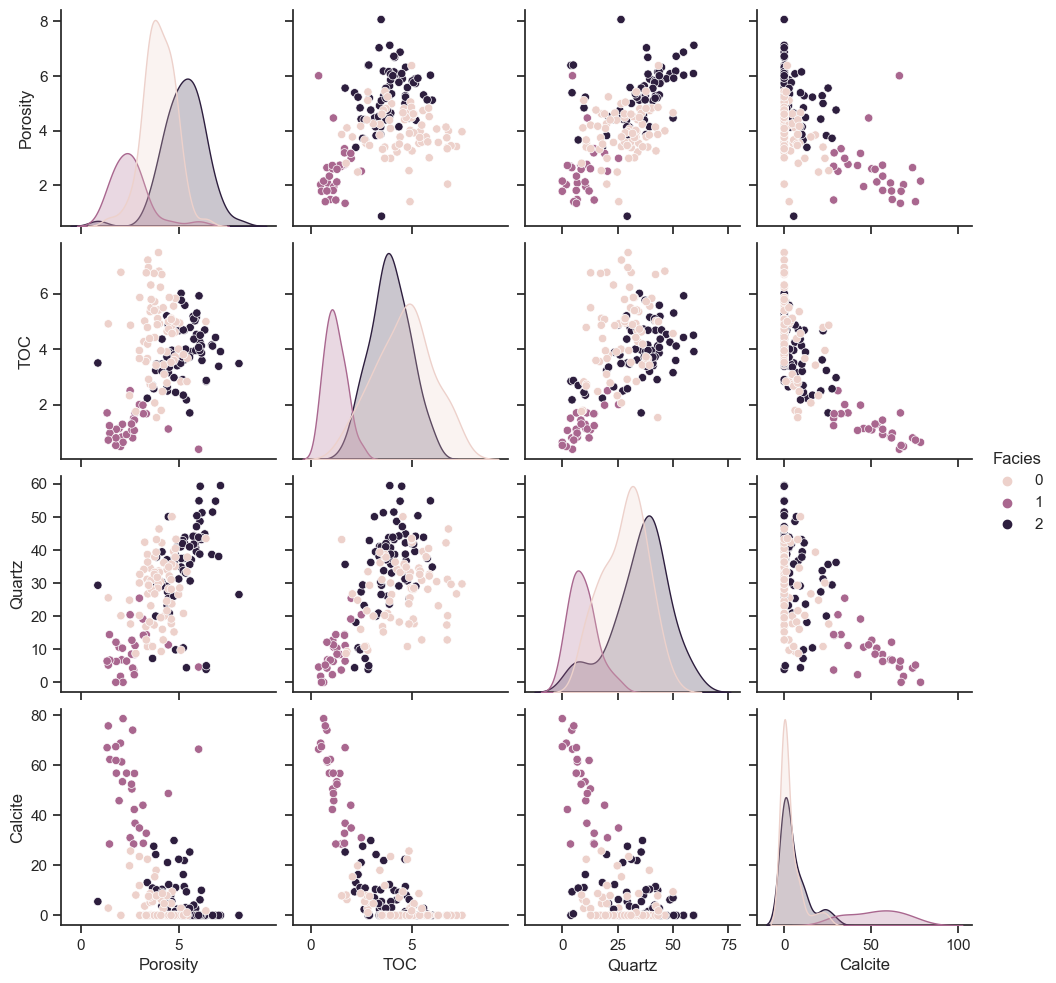

In [37]:
sns.set(style = 'ticks') # Set the background to ticks

df['Facies'] = kmeans.labels_

sns.pairplot(df, vars=['Porosity','TOC','Quartz','Calcite'], hue = 'Facies') # Create a matrix scatterplot

<Axes: xlabel='Facies', ylabel='Porosity'>

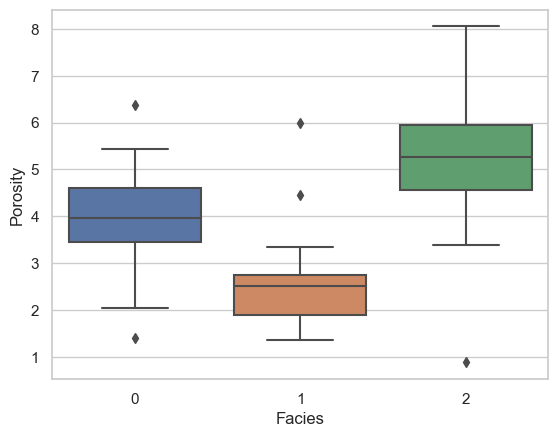

In [38]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Facies'], y=df['Porosity'])

<Axes: xlabel='Facies', ylabel='TOC'>

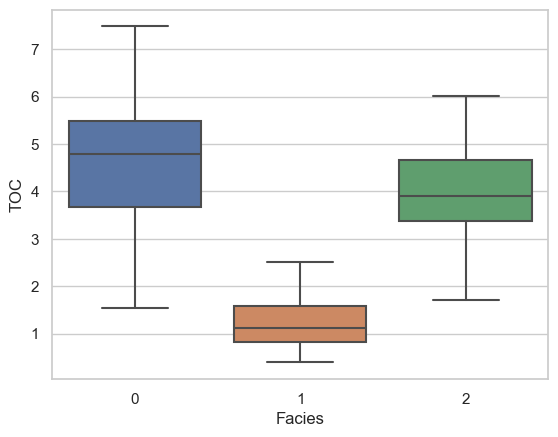

In [39]:
sns.boxplot(x=df['Facies'], y=df['TOC'])

<Axes: xlabel='Facies', ylabel='Calcite'>

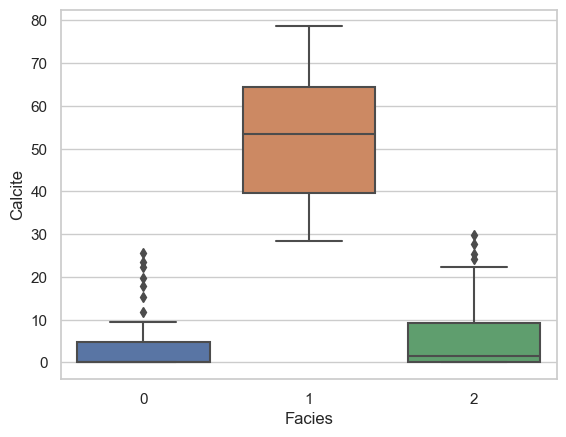

In [40]:
sns.boxplot(x=df['Facies'], y=df['Calcite'])

<Axes: xlabel='Facies', ylabel='Quartz'>

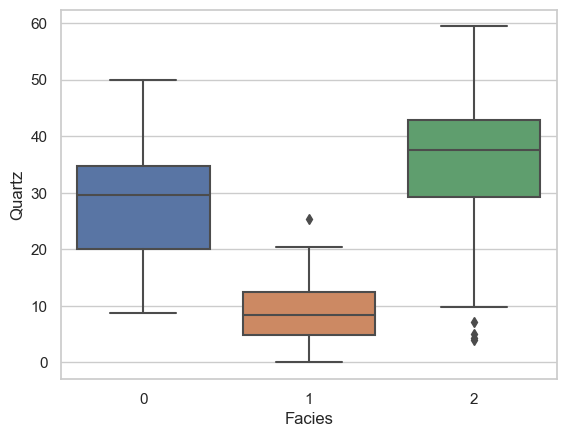

In [41]:
sns.boxplot(x=df['Facies'], y=df['Quartz'])